In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\san_tang_hu"
wind_turbine = "89"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (139, 75)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

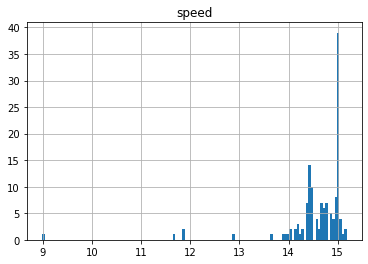

In [5]:
speed.hist(bins=128)

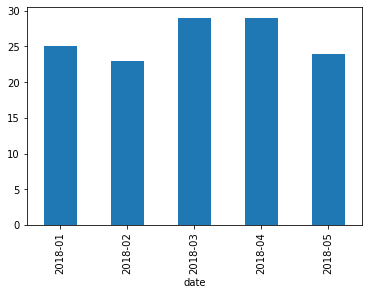

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
train_start = "2018-01"
train_end = "2018-04"

test_start = "2018-05"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (115, 75)
feature_test.shape: (24, 75)


In [8]:
feature_test = feature["2018-04": ]
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [10]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

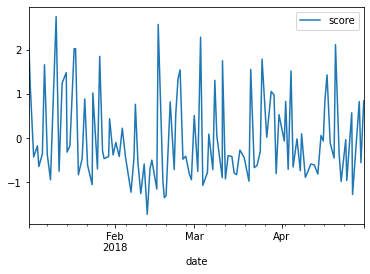

In [11]:
detector.decision_scores.plot()

In [12]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

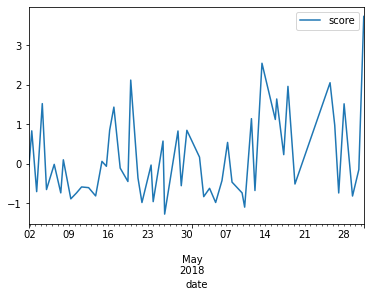

In [13]:
anomaly_scores.plot()

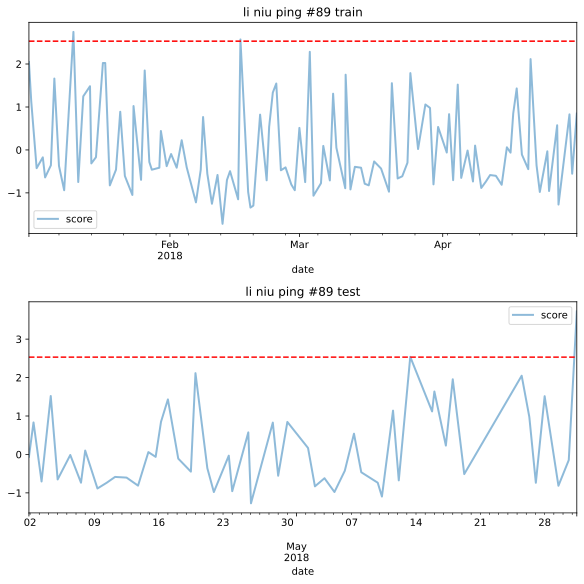

In [14]:
anomaly_scores_train = detector.decision_scores
label_train = detector.label
# 测试
anomaly_scores_test = detector.decision_function(feature_test)
label_test = detector.predict(feature_test)
fig, ax = visualization.plot_line(anomaly_scores_train, label_train,
    anomaly_scores_test, label_test, detector.threshold, "li niu ping", 
    wind_turbine)

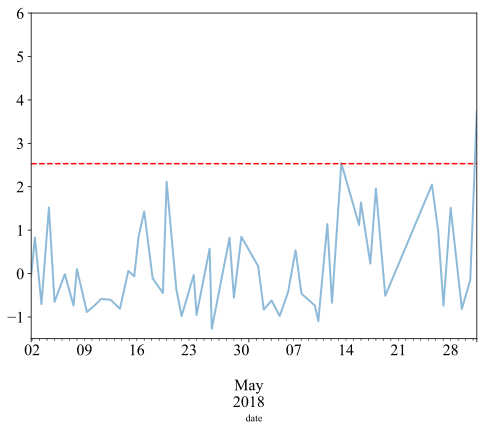

In [15]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',  # 设置字体类型
}
rcParams.update(config)

visualization.set_figsize(figsize=(8, 6))
fig, ax = plt.subplots()
anomaly_scores_test.plot(ax=ax, linewidth=2, alpha=0.5, legend=False, fontsize=16, ylim=(-1.5, 6))
ax.plot(anomaly_scores_test.index, [detector.threshold] * len(anomaly_scores_test), "r--", label="threshold")
ax.scatter(x=anomaly_scores_test[label_test.label].index, y=anomaly_scores_test[label_test.label], c="r")


In [16]:
feature

gearbox                                                    \
                      mean        sd      root       rms      peak  skewness   
date                                                                           
2018-01-01 12:00 -0.000243  0.391626  0.259928  0.391625  1.648751 -0.101734   
2018-01-02 00:00 -0.000145  0.320731  0.218599  0.320730  1.277095  0.010100   
2018-01-03 04:00 -0.000378  0.201263  0.133959  0.201263  0.972958  0.050110   
2018-01-04 12:00  0.000239  0.214717  0.144816  0.214717  0.991183 -0.025312   
2018-01-05 00:00 -0.000503  0.178622  0.118537  0.178622  0.873620  0.023875   
...                    ...       ...       ...       ...       ...       ...   
2018-05-27 01:00 -0.000242  0.173690  0.117636  0.173690  0.775380  0.023290   
2018-05-28 00:00  0.000027  0.354668  0.233096  0.354667  1.462750 -0.035344   
2018-05-29 12:00 -0.000621  0.178585  0.119228  0.178586  0.814317  0.089421   
2018-05-30 15:00 -0.000194  0.181108  0.119848  0.181108  0.949298  0.049602   
2018-05-31 12:00 -0.000682  0.402861  0.270958  0.402861  1.657427 -0.060578   

                                                          ...  \
                  kurtosis     crest clearance     shape  ...   
date                                                      ...   
2018-01-01 12:00  0.093348  4.210022  6.343111  1.267043  ...   
2018-01-02 00:00 -0.112740  3.981833  5.842182  1.246745  ...   
2018-01-03 04:00  0.194719  4.834259  7.263087  1.265955  ...   
2018-01-04 12:00  0.008682  4.616239  6.844416  1.254838  ...   
2018-01-05 00:00  0.270951  4.890876  7.370018  1.268684  ...   
...                    ...       ...       ...       ...  ...   
2018-05-27 01:00  0.018128  4.464167  6.591369  1.252345  ...   
2018-05-28 00:00  0.083677  4.124291  6.275317  1.273134  ...   
2018-05-29 12:00  0.192928  4.559813  6.829910  1.263785  ...   
2018-05-30 15:00  0.364202  5.241608  7.920823  1.271674  ...   
2018-05-31 12:00 -0.026204  4.114144  6.116914  1.256683  ...   

                 high_speed_shaft                                       \
                               p5         p6           p7           p8   
date                                                                     
2018-01-01 12:00      3654.509016  79.408874  4830.120817  8215.059412   
2018-01-02 00:00      3387.545797  80.957972  4560.874672  8082.996514   
2018-01-03 04:00      3297.291176  60.312520  4394.776357  7826.101959   
2018-01-04 12:00      3653.471992  68.595976  4732.558432  7948.080095   
2018-01-05 00:00      3337.379312  59.128776  4382.910796  7694.112191   
...                           ...        ...          ...          ...   
2018-05-27 01:00      3373.704451  58.366743  4447.111648  7779.992275   
2018-05-28 00:00      3681.995449  76.089833  4855.003436  8208.466473   
2018-05-29 12:00      3090.801884  62.516496  4176.915373  7814.913448   
2018-05-30 15:00      2883.050061  62.846531  3991.680549  7815.907538   
2018-05-31 12:00      3179.224207  87.163880  4391.889589  8219.119720   

                                                                        \
                        p9       p10        p11          p12       p13   
date                                                                     
2018-01-01 12:00  0.587959  0.021729  31.833830  3628.585563  0.003537   
2018-01-02 00:00  0.564255  0.023899  35.414452  3647.235301  0.003791   
2018-01-03 04:00  0.561554  0.018292  47.432769  6367.164861  0.002595   
2018-01-04 12:00  0.595434  0.018776  34.997271  4567.812270  0.003006   
2018-01-05 00:00  0.569645  0.017717  45.883806  6427.367552  0.002602   
...                    ...       ...        ...          ...       ...   
2018-05-27 01:00  0.571609  0.017300  46.168009  6606.378613  0.002472   
2018-05-28 00:00  0.591463  0.020665  32.542611  3874.574452  0.003298   
2018-05-29 12:00  0.534480  0.020227  52.815636  6469.312558  0.002829   
2018-05-30 15:00  0.510712  0.021799  57.499296  6861.537603  

In [17]:
feature_test

gearbox                                                    \
                      mean        sd      root       rms      peak  skewness   
date                                                                           
2018-04-01 21:00  0.000437  0.177436  0.120948  0.177436  0.775371 -0.006631   
2018-04-02 09:00  0.000424  0.303915  0.201403  0.303914  1.349540 -0.107023   
2018-04-03 06:00  0.000491  0.186832  0.125293  0.186832  0.842906  0.013371   
2018-04-04 06:00 -0.000482  0.350744  0.230498  0.350743  1.471298 -0.043542   
2018-04-05 00:00 -0.000428  0.198504  0.133971  0.198504  0.916240 -0.012814   
2018-04-06 09:00 -0.000235  0.212531  0.142193  0.212531  0.983808 -0.012203   
2018-04-07 13:00 -0.000042  0.194559  0.130541  0.194558  0.886713  0.064307   
2018-04-08 00:00 -0.000042  0.046376  0.031340  0.046376  0.222390 -0.024468   
2018-04-09 08:00 -0.000080  0.191603  0.128459  0.191602  0.883501  0.056394   
2018-04-10 08:00 -0.000109  0.047362  0.031853  0.047362  0.232772 -0.154489   
2018-04-11 06:00  0.000101  0.209872  0.139934  0.209872  1.011318  0.020761   
2018-04-12 12:00  0.000677  0.104759  0.069978  0.104761  0.527473 -0.047598   
2018-04-13 18:00 -0.000593  0.193807  0.130121  0.193807  0.863146  0.001646   
2018-04-14 21:00 -0.000149  0.271705  0.180900  0.271704  1.213647 -0.069327   
2018-04-15 16:00 -0.000281  0.225821  0.153088  0.225821  0.914231  0.044467   
2018-04-16 06:00  0.000402  0.301089  0.205693  0.301089  1.298099  0.012097   
2018-04-17 00:00 -0.000305  0.316305  0.216016  0.316304  1.301717  0.000180   
2018-04-18 03:00  0.000019  0.043956  0.029994  0.043956  0.189822 -0.057027   
2018-04-19 12:00  0.000039  0.045908  0.030508  0.045908  0.246036 -0.114489   
2018-04-20 00:00  0.000435  0.366984  0.236738  0.366983  1.517375 -0.098362   
2018-04-21 07:00 -0.000265  0.205761  0.137220  0.205761  1.013547  0.028757   
2018-04-22 00:00  0.000289  0.183377  0.123086  0.183376  0.835825  0.026229   
2018-04-23 15:00 -0.000077  0.204640  0.137435  0.204639  0.902298  0.041649   
2018-04-24 00:00 -0.000218  0.172559  0.116408  0.172559  0.797285  0.027346   
2018-04-25 18:00  0.000168  0.214977  0.144252  0.214977  1.195809  0.017835   
2018-04-26 01:00  0.000242  0.172849  0.115911  0.172849  0.908757 -0.028280   
2018-04-28 10:00  0.000245  0.296586  0.196731  0.296585  1.358748 -0.116822   
2018-04-29 00:00  0.000154  0.201858  0.135775  0.201857  0.923781  0.004221   
2018-04-30 00:00  0.000233  0.324399  0.221826  0.324398  1.299037 -0.033311   
2018-05-02 06:00  0.000150  0.300596  0.204101  0.300595  1.305630 -0.020802   
2018-05-03 00:00 -0.000060  0.193499  0.130481  0.193498  0.840189  0.035750   
2018-05-04 01:00 -0.000363  0.227603  0.156310  0.227603  0.933894  0.002566   
2018-05-05 03:00 -0.000153  0.179585  0.120337  0.179584  0.798901  0.103583   
2018-05-06 06:00 -0.000304  0.235406  0.158400  0.235406  0.991860 -0.059117   
2018-05-07 06:00 -0.000603  0.302130  0.195818  0.302130  1.453544 -0.104682   
2018-05-08 01:00 -0.000239  0.220508  0.150939  0.220507  0.889010 -0.021542   
2018-05-09 20:00 -0.000222  0.180407  0.120504  0.180407  0.897612  0.026803   
2018-05-10 07:00  0.000044  0.182769  0.123623  0.182768  0.830687  0.005552   
2018-05-11 12:00  0.000214  0.340000  0.236143  0.339999  1.360062  0.014302   
2018-05-12 03:00  0.000056  0.173568  0.116243  0.173568  0.849079  0.083963   
2018-05-13 09:00  0.000130  0.377284  0.249204  0.377283  1.625380 -0.090012   
2018-05-15 18:00  0.000048  0.326166  0.214636  0.326165  1.353658 -0.110894   
2018-05-16 00:00 -0.000169  0.359144  0.249155  0.359143  1.366085  0.031444   
2018-05-17 06:00  0.000160  0.224472  0.151178  0.224472  1.058140  0.023941   
2018-05-18 00:00 -0.000347  0.358636  0.236604  0.358635  1.484984 -0.113472   
2018-05-19 06:00  0.000152  0.185640  0.124239  0.185639  0.933527  0.053296   
2018-05-25 12:00  0.000093  0.345115  0.231164  0.345114  1.470233 -0.074837   
2018-05-26 08:00 -0